### CSE-221710315009-Ch.Sai Pranathi

### Student Intervention

#### Problem Statement:
To identify students who might need early intervention before they fail to graduate

#### Importing Libraries

In [166]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import f1_score
%matplotlib inline

In [167]:
#For ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

#### Reading the Dataset

In [168]:
#Importing the Dataset
student_data = pd.read_csv(r"C:\Users\Sri\Documents\csv file\student-data.csv")

In [169]:
#data set head values
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [170]:
# Type of data is a pandas DataFrame
# Hence I can use pandas DataFrame methods
type(student_data)

pandas.core.frame.DataFrame

In [188]:
#dataset columns
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [189]:
# We want to get the column name "passed" which is the last 
student_data.columns[-1]

'passed'

In [190]:
# This would get everything except for the last element that is "passed"
student_data.columns[:-1]

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')

In [191]:
student_data.nunique()#unique values

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      34
passed         2
dtype: int64

In [192]:
#getting information of data
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [193]:
#Description of data
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [194]:
#correlation of the data
student_data.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908


### Visualization of data

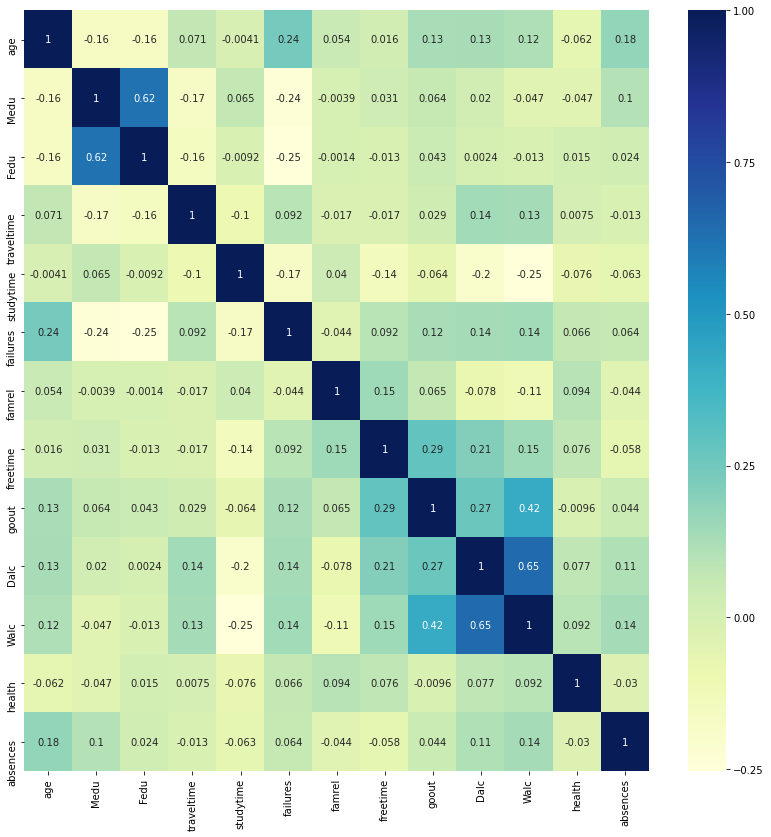

In [195]:
#Visualization of Correlation (between columns)
plt.figure(figsize=(14,14))
sns.heatmap(student_data.corr(),annot=True,cmap='YlGnBu')

Correlation between the columns of the Dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F49868B748>,
      dtype=object)

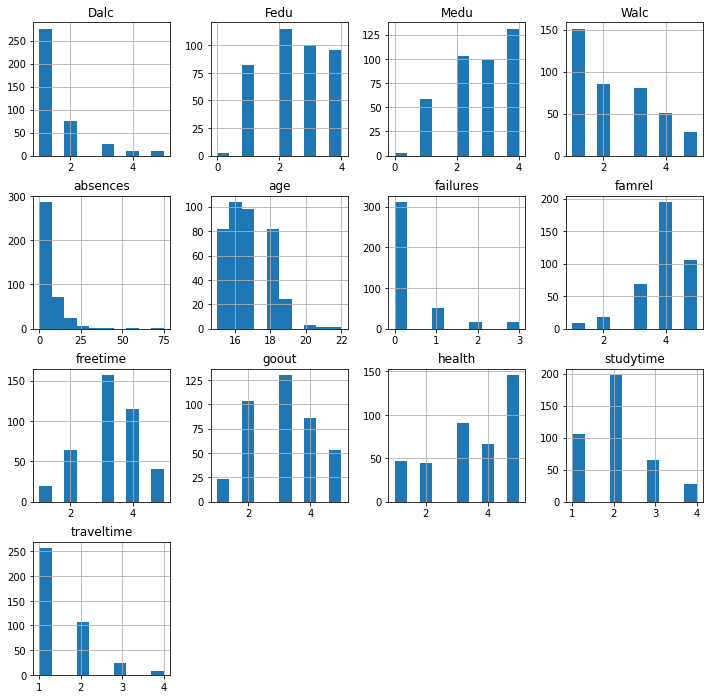

In [196]:
student_data.hist(figsize=(12,12))

In [197]:
student_data.passed.value_counts()

yes    265
no     130
Name: passed, dtype: int64

In [198]:
student_data.passed.value_counts(normalize=True)

yes    0.670886
no     0.329114
Name: passed, dtype: float64

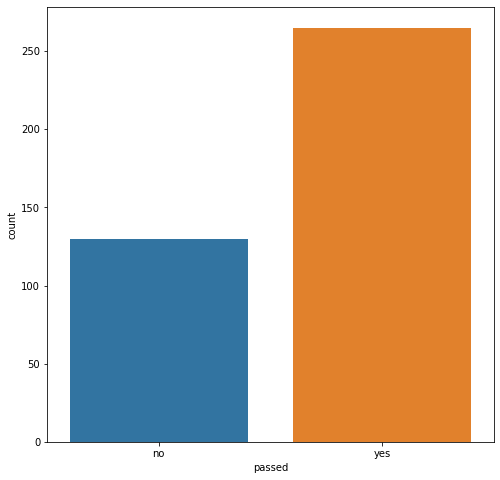

In [199]:
plt.figure(figsize=(8,8))
sns.countplot(student_data['passed'])

Text(0.5, 1.0, 'percentage of passes and not passed')

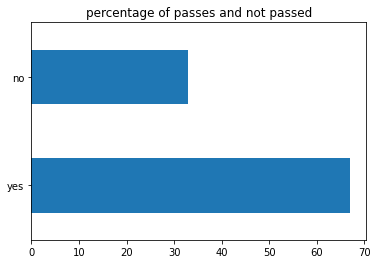

In [201]:
#Visualizing percentage of passed students
(student_data.passed.value_counts(normalize=True)*100).plot.barh().set_title("percentage of passes and not passed")

In the plots above we get a visualization of the students who passed and not passed the passed are more in number

### Data Cleaning/ Data Pre-processing:  

In [202]:
#Finding the missing values(Handilng the missing values)
student_data.isnull().sum()#missing values are not there

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [203]:
student_data = student_data.apply(lambda x : x.fillna(x.value_counts().index[0]))
student_data.isnull().sum()#finding missing values

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

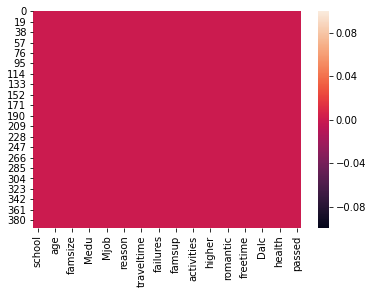

In [204]:
#Visualizing the missing values
sns.heatmap(student_data.isna())#as no missing values the heat map is plain

By the above heat map we can come to a conclusion that there are no missing values 

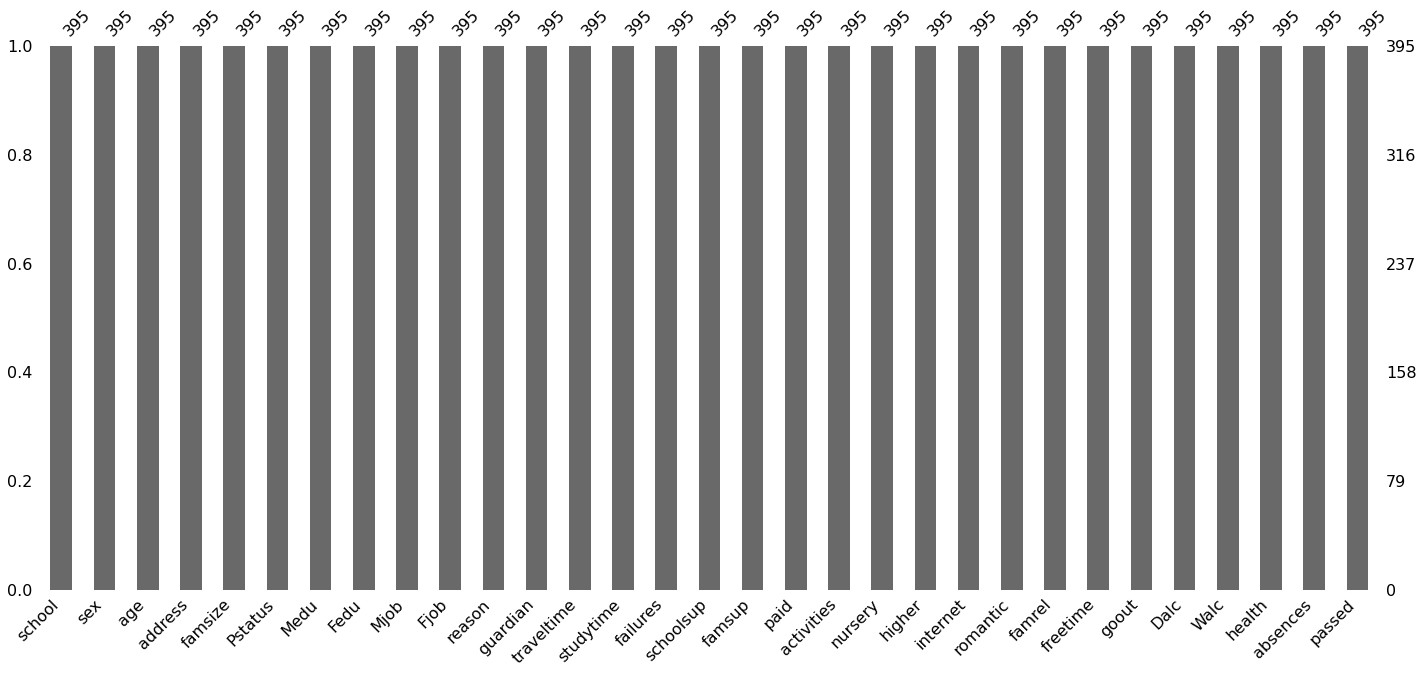

In [205]:
import missingno as msno
msno.bar(student_data)

Using Missingno there is clear visualization that there are no missing values in the data

### Data Exploration

The dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:

- The total number of students, n_students.
- The total number of features for each student, n_features.
- The number of those students who passed, n_passed.
- The number of those students who failed, n_failed.
- The graduation rate of the class, grad_rate, in percent (%).

In [207]:
#Calculate number of students
n_students = len(student_data)

#Calculate number of features
n_features = len(student_data.columns[:-1])

#Calculate passing students
n_passed = len(student_data[student_data.passed=="yes"])

#Calculate failing students
n_failed = len(student_data[student_data.passed=="no"])

# Calculate graduation rate
grad_rate = n_passed/(n_passed+n_failed)*100

# Print the results
print ("Total number of students: {}".format(n_students))
print ("Number of features: {}".format(n_features))
print ("Number of students who passed: {}".format(n_passed))
print ("Number of students who failed: {}".format(n_failed))
print ("Graduation rate of the class: {:.2f}%".format(grad_rate))

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


In [175]:
# Extract feature columns
# As seen above, we're getting all the columns except "passed" here but we're converting it to a list
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
# As seen above, since "passed" is last in the list, we're extracting using [-1]
target_col = student_data.columns[-1]

# Show the list of columns
print ("Feature columns:\n{}".format(feature_cols))
print ("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print("\nFeature values:")
print(X_all.head())

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  higher internet  romantic  famrel  freetime goout Dalc Walc health absences  
0    yes       no        no       4         3     4    1    1     

In [176]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''

    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)

        # Collect the revised columns
        output = output.join(col_data)

    return output

X_all = preprocess_features(X_all)
print( "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Implementation: Training and Testing Data Split

In [209]:
#Import any additional functionality you may need here
from sklearn.model_selection import train_test_split

In [210]:
# For initial train/test split, we can obtain stratification by simply using stratify = y_all:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, stratify = y_all, test_size=95, random_state=42)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 300 samples.
Testing set has 95 samples.


In [179]:
# To double check stratification
print(np.mean(y_train == 'no'))
print(np.mean(y_test == 'no'))

0.33
0.3263157894736842


###  Model Performance

In [211]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print ("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print ("Made predictions in {:.4f} seconds.".format(end - start))
    return f1_score(target.values, y_pred, pos_label='yes')

def train_predict(clf, X_train, y_train, X_test, y_test):    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

In [212]:
# Import the three supervised learning models from sklearn
# from sklearn import model_A
from sklearn.ensemble import RandomForestClassifier
# Initialize the model
rf = RandomForestClassifier(random_state=765)
# Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

# Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)

for clf in [rf]:
    print ("\n{}: \n".format(clf.__class__.__name__))
    for n in [100, 200, 300]:
        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)


RandomForestClassifier: 

Training a RandomForestClassifier using a training set size of 100. . .
Trained model in 0.0260 seconds
Made predictions in 0.0050 seconds.
F1 score for training set: 0.9924.
Made predictions in 0.0050 seconds.
F1 score for test set: 0.6667.
Training a RandomForestClassifier using a training set size of 200. . .
Trained model in 0.0530 seconds
Made predictions in 0.0060 seconds.
F1 score for training set: 0.9884.
Made predictions in 0.0050 seconds.
F1 score for test set: 0.6393.
Training a RandomForestClassifier using a training set size of 300. . .
Trained model in 0.0151 seconds
Made predictions in 0.0156 seconds.
F1 score for training set: 0.9925.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7556.


In [182]:
# Import the  supervised learning models from sklearn
# from sklearn import model_B
from sklearn import svm
# Initialize the three models
sv = svm.SVC(random_state=765)
# Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

# Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)

for clf in [sv]:
    print ("\n{}: \n".format(clf.__class__.__name__))
    for n in [100, 200, 300]:
        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)


SVC: 

Training a SVC using a training set size of 100. . .
Trained model in 0.0050 seconds
Made predictions in 0.0440 seconds.
F1 score for training set: 0.8354.
Made predictions in 0.0050 seconds.
F1 score for test set: 0.8025.
Training a SVC using a training set size of 200. . .
Trained model in 0.0150 seconds
Made predictions in 0.0100 seconds.
F1 score for training set: 0.8431.
Made predictions in 0.0040 seconds.
F1 score for test set: 0.8105.
Training a SVC using a training set size of 300. . .
Trained model in 0.0380 seconds
Made predictions in 0.0120 seconds.
F1 score for training set: 0.8664.
Made predictions in 0.0050 seconds.
F1 score for test set: 0.8052.


In [183]:
# Import the supervised learning models from sklearn
# from skearln import model_C
from sklearn.naive_bayes import GaussianNB

# Initialize the three models
nb = GaussianNB()

# Set up the training set sizes
X_train_100 = X_train[:100]
y_train_100 = y_train[:100]

X_train_200 = X_train[:200]
y_train_200 = y_train[:200]

X_train_300 = X_train[:300]
y_train_300 = y_train[:300]

# Execute the 'train_predict' function for each classifier and each training set size
# train_predict(clf, X_train, y_train, X_test, y_test)

for clf in [nb]:
    print ("\n{}: \n".format(clf.__class__.__name__))
    for n in [100, 200, 300]:
        train_predict(clf, X_train[:n], y_train[:n], X_test, y_test)


GaussianNB: 

Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0130 seconds
Made predictions in 0.0090 seconds.
F1 score for training set: 0.7752.
Made predictions in 0.0030 seconds.
F1 score for test set: 0.6457.
Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0110 seconds
Made predictions in 0.0030 seconds.
F1 score for training set: 0.8060.
Made predictions in 0.0090 seconds.
F1 score for test set: 0.7218.
Training a GaussianNB using a training set size of 300. . .
Trained model in 0.0090 seconds
Made predictions in 0.0050 seconds.
F1 score for training set: 0.8134.
Made predictions in 0.0030 seconds.
F1 score for test set: 0.7761.


### Choosing the Best Model
In this final section, you will choose from the three supervised learning models the best model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (X_train and y_train) by tuning at least one parameter to improve upon the untuned model's F1 score.

We should choose the Support Vector Machine model. During the experiments, it provided a more robust performance on the testing set compare to Naive Bayes and Random Forest Classifier. The F1 score which is a measure of a test's accuracy is equal to 0.8052 for support vector machine with 300 records used in the training set, when the F1 score is equal to 0.7556 and 0.7761 respectively for Random Forest Classifier and Naive Bayes.

The support vector machine tends to be slower to train than Naive Bayes. However because we probably won't use the model as a real-time application and it's critical to predict accuratly which students might need intervention, we should priviledge accuracy over speed.

In [184]:
#Import 'GridSearchCV' and 'make_scorer'
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

# Create the parameters list you wish to tune
parameters = dict(C=np.logspace(-6, -1, 10),kernel=['linear','poly', 'rbf', 'sigmoid'],
                  gamma=[1,0.1,0.01,0.001, 0.0001],random_state=[765])

# Initialize the classifier
clf = svm.SVC()

# Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label="yes")

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, param_grid = parameters,scoring=f1_scorer)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train, y_train)

# Get the estimator
clf = grid_obj.best_estimator_

In [185]:
print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))

Made predictions in 0.0130 seconds.
F1 score for training set: 0.8319.
Made predictions in 0.0030 seconds.
F1 score for test set: 0.7947.


In [187]:
print(clf)

SVC(C=0.02782559402207126, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=765, shrinking=True, tol=0.001,
    verbose=False)


After tuning the algorithm, the F1 score for training is equal to 0.8344 and for testing is equal to 0.7919. The F1 score to  for training has decreased from 0.86 to 0.8319. The main reason why the untuned model has a better F1 score for training model, but a worse score for testing, is because the untuned model tends to overfit.